In [2]:
##Gaussian Process
import numpy as np
#1d Space


In [3]:
def sample_spacetime_gp(space_coords, time_coords, 
                        sigma2=1.0, alpha_space=1.0, alpha_time=1.0, 
                        random_state=None):
    """
    Generate a single realization from a spatio-temporal Gaussian Process
    on a 1D space grid and 1D time grid, with an exponential separable kernel.

    Parameters
    ----------
    space_coords : 1D array of shape (M,)
        Sorted array of spatial locations, e.g. np.linspace(0, 10, 50)
    time_coords : 1D array of shape (N,)
        Sorted array of time points, e.g. np.linspace(0, 5, 20)
    sigma2 : float
        Overall variance scale (sigma^2) of the process.
    alpha_space : float
        Correlation length scale in space.
    alpha_time : float
        Correlation length scale in time.
    random_state : int or None
        If an int, sets the numpy random seed for reproducibility.

    Returns
    -------
    Z : 2D numpy array of shape (M, N)
        One realization of the GP, so that Z[i,j] = GP(s_i, t_j).
    """

    if random_state is not None:
        np.random.seed(random_state)
    
    M = len(space_coords)
    N = len(time_coords)
    num_points = M * N
    
    # 1) Flatten all space-time points into an array of length (M*N, 2).
    #    We'll store them as (s_i, t_j).
    #    We'll create:
    #       all_points[k] = (space_index, time_index) in continuous domain
    #    Then we build the covariance matrix K of shape (num_points, num_points).
    all_points = []
    for i, s in enumerate(space_coords):
        for j, t in enumerate(time_coords):
            all_points.append((s, t))
    all_points = np.array(all_points)  # shape (M*N, 2)
    
    # 2) Build the covariance matrix K
    #    K[k, l] = k( all_points[k], all_points[l] )
    K = np.zeros((num_points, num_points), dtype=float)
    
    for k in range(num_points):
        s1, t1 = all_points[k]
        for l in range(num_points):
            s2, t2 = all_points[l]
            dist_space = abs(s1 - s2)
            dist_time = abs(t1 - t2)
            # Exponential separable kernel
            K[k, l] = sigma2 * np.exp(-dist_space/alpha_space) * np.exp(-dist_time/alpha_time)
    
    # 3) Sample from multivariate normal(0, K)
    #    We get a vector 'z' of length (num_points,)
    z = np.random.multivariate_normal(mean=np.zeros(num_points), cov=K)
    
    # 4) Reshape z into (M, N)
    Z = z.reshape(M, N)
    
    return Z


In [5]:
# Suppose we have M=20 spatial points, N=10 time points
space_coords = np.linspace(0, 10, 20)  # 20 points from 0 to 10
time_coords = np.linspace(0, 5, 10)    # 10 points from 0 to 5

Z = sample_spacetime_gp(
    space_coords, time_coords, 
    sigma2=1, alpha_space=0.01, alpha_time=10,
    random_state=None#5334 #Seed
)

print("Shape of Z:", Z.shape)  # (20, 10)
# Z[i, j] = the value of the GP at space_coords[i], time_coords[j]
Z

#Z[2,:]

Shape of Z: (20, 10)


array([[ 1.97516164e-01, -3.73705547e-01, -5.34379822e-01,
        -3.77825737e-01, -6.37003058e-01, -5.66262627e-01,
        -3.41597938e-01, -4.92068685e-01, -5.22898315e-02,
        -3.56833679e-01],
       [ 1.66290247e+00,  1.59167395e+00,  1.13617215e+00,
         1.05395391e+00,  1.36376568e+00,  1.99662226e+00,
         2.01062111e+00,  1.83932062e+00,  1.38249771e+00,
         1.29091430e+00],
       [ 1.81273588e+00,  1.77030583e+00,  1.59527530e+00,
         1.99639763e+00,  1.91640253e+00,  1.81398614e+00,
         1.81724730e+00,  1.40638925e+00,  1.38577810e+00,
         1.43416410e+00],
       [ 3.91634664e-01,  3.27416125e-01,  2.40524769e-01,
         2.59606739e-01,  1.17582835e-01, -7.60395960e-02,
        -7.43488472e-02,  6.74259946e-02,  4.27752816e-01,
         3.02053419e-01],
       [ 1.53268365e+00,  1.40756433e+00,  1.58751122e+00,
         1.18217895e+00,  1.19184556e+00,  9.30130229e-01,
         1.02696698e+00,  1.01961310e+00,  7.43935953e-01,
         4.

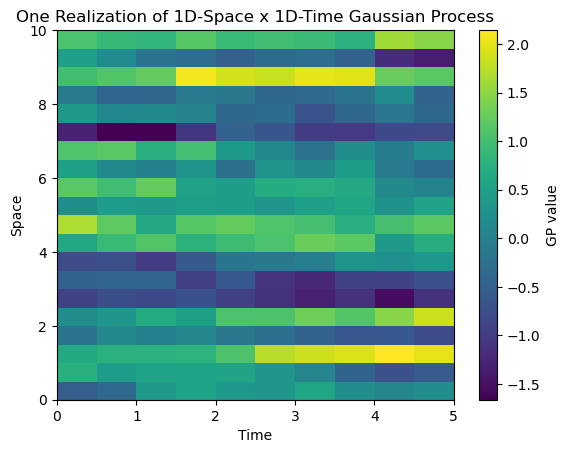

In [158]:
import matplotlib.pyplot as plt

plt.imshow(Z, aspect='auto', origin='lower',
           extent=[time_coords[0], time_coords[-1], space_coords[0], space_coords[-1]])
plt.colorbar(label='GP value')
plt.xlabel('Time')
plt.ylabel('Space')
plt.title('One Realization of 1D-Space x 1D-Time Gaussian Process')
plt.show()


In [44]:
import sigkernel
import torch

In [ ]:
# forecastest = torch.zeros([batchsize,20,10], device = 'cuda')
# for i in range(batchsize):
#     Z = sample_spacetime_gp(
#     space_coords, time_coords, 
#     sigma2=1, alpha_space=3, alpha_time=5,
#     random_state=None
#     )
#     forecastest[i] = torch.transpose(torch.tensor(Z), 0, 1)

In [168]:
spacetheta = np.linspace(0.05,1,20)
len(spacetheta)
spacetheta

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [169]:
spacemax = 10
timemax = 20
batchsize = 10
space_coords = np.linspace(0, spacemax, spacemax)  # 20 points from 0 to 10
time_coords = np.linspace(0, timemax, timemax)    # 10 points from 0 to 5
truedata = torch.zeros([batchsize,20,10], device = 'cuda')
for i in range(batchsize):
    Z = sample_spacetime_gp(
    space_coords, time_coords, 
    sigma2=1, alpha_space=0.5, alpha_time=2,
    random_state=5334
    )
    truedata[i] = torch.transpose(torch.tensor(Z), 0, 1)



In [170]:
def computecore(obs,forc):
        static_kernel = sigkernel.Linear_ID_Kernel()
        dyadic_order = 2
        signature_kernel = sigkernel.SigKernel(static_kernel, dyadic_order)

        true = obs/np.sqrt(spacemax)
        forecast = forc/np.sqrt(spacemax)


        time_vec = torch.linspace(0, 1, steps=20, device="cuda")
        time_vec = time_vec.unsqueeze(0).unsqueeze(-1) 
        time_vec = time_vec.expand(batchsize, -1, -1) 
                
        y = torch.cat([true, time_vec], dim=-1)
        X = torch.cat([forecast,time_vec],dim=-1)

        score = signature_kernel.compute_expected_scoring_rule(X,y)

        return(score)


In [171]:
spacetheta = np.linspace(0.05,1,20)
forecastgroup = torch.zeros([len(spacetheta),batchsize,20,10], device = 'cuda')
for st in range(len(spacetheta)):
    theta = spacetheta[st]
    print(theta)
    for i in range(batchsize):
        Z = sample_spacetime_gp(
        space_coords, time_coords, 
        sigma2=1, alpha_space=theta, alpha_time=2,
        random_state=5334
        )
        # print(forecastgroup[st,i].shape)
        # print(torch.transpose(torch.tensor(Z), 0, 1).shape)
        forecastgroup[st,i] = torch.transpose(torch.tensor(Z), 0, 1)

0.05
0.1
0.15
0.2
0.25
0.3
0.35
0.39999999999999997
0.44999999999999996
0.49999999999999994
0.5499999999999999
0.6
0.65
0.7
0.75
0.7999999999999999
0.85
0.9
0.95
1.0


tensor(381.1750, device='cuda:0')
tensor(295.9939, device='cuda:0')
tensor(392.2869, device='cuda:0')
tensor(1134.2842, device='cuda:0')
tensor(579.8031, device='cuda:0')
tensor(418.7124, device='cuda:0')
tensor(435.9560, device='cuda:0')
tensor(354.8269, device='cuda:0')
tensor(536.3807, device='cuda:0')
tensor(-451.3357, device='cuda:0')
tensor(1893.0836, device='cuda:0')
tensor(985.5733, device='cuda:0')
tensor(758.0209, device='cuda:0')
tensor(892.9868, device='cuda:0')
tensor(670.6561, device='cuda:0')
tensor(993.0452, device='cuda:0')
tensor(288.7646, device='cuda:0')
tensor(1548.9916, device='cuda:0')
tensor(444.4020, device='cuda:0')
tensor(2753.0515, device='cuda:0')


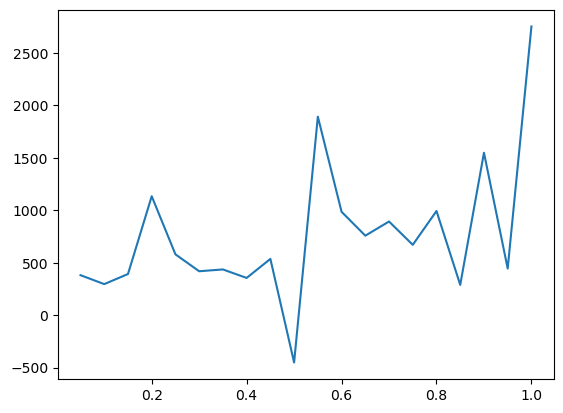

In [173]:
scores = torch.zeros(len(spacetheta))
for st in range(len(spacetheta)):
    score = computecore(truedata,forecastgroup[st])
    print(score)
    scores[st] = score

plt.plot(spacetheta,scores)
plt.show()

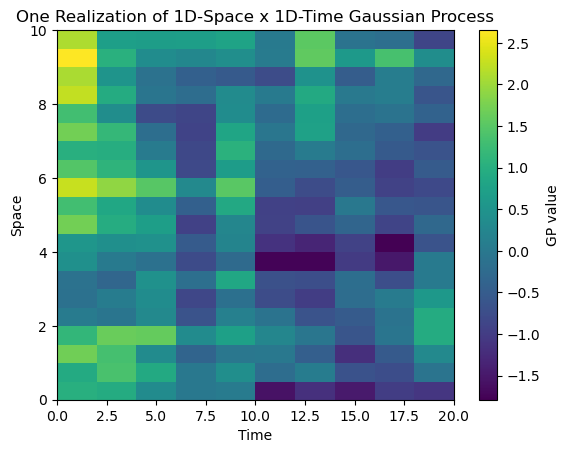

In [69]:
plt.imshow(true[3], aspect='auto', origin='lower',
           extent=[time_coords[0], time_coords[-1], space_coords[0], space_coords[-1]])
plt.colorbar(label='GP value')
plt.xlabel('Time')
plt.ylabel('Space')
plt.title('One Realization of 1D-Space x 1D-Time Gaussian Process')
plt.show()
